In [1]:
import sys
import pickle
import importlib

sys.path.append('../src')
from utils import data_handler

#### 0. BRCA

In [ ]:
importlib.reload(data_handler)

data, metadata = data_handler.generate_dataset_BRCA(
    MAD_threshold = 1)

with open('../workfiles/BRCA_ds.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

loading samples...
loaded 1231 / 1231 samples
60660
50
removing 37 mithocondrial genes from the dataset
selecting genes based on expression threshold:  0.1 ...
min expression level 0.0
max expression level 1.0


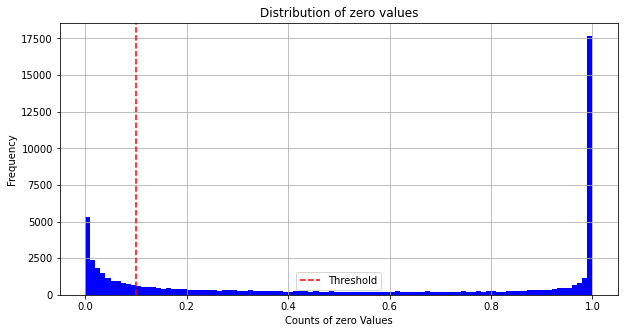

removing 37862 genes under the expression threshold from the dataset
number of genes selected :  22761
matching :  22761
log(1 + x) transformation...
scaling to [0, 1]...
shape of the dataset : (1231, 22761)
number of seq in the dataset : 1231


In [4]:
importlib.reload(data_handler)

data, metadata = data_handler.generate_dataset_BRCA(
    MAD_threshold = None, MT_removal= True, expression_threshold= 0.1, keep_only_protein_coding = False, verbose = 1)

with open('../workfiles/BRCA_ds.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

In [ ]:
#trying with normalization
importlib.reload(data_handler)

data, metadata = data_handler.generate_dataset_BRCA(
    MAD_threshold = 1, normalization= True)

with open('../workfiles/normed_BRCA_ds.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

### Chose to include a gene selection file, or not:

In [ ]:
suggested_genes_file_1 = '../../data/PD_genes_of_interest/signif_de_Disease_status_IDIOPATHIC_PD_01.tsv'
suggested_genes_file_2 = '../../data/PD_genes_of_interest/signif_de_PD_DIAGNOSIS_0.1.tsv'

### Generate all datasets necessary for experiments and pickle them

#### 1. Genomic datasets

In [ ]:
data, metadata = data_handler.generate_dataset_genes(
    MAD_threshold = 2, 
    gene_selection_file = None)

with open('../workfiles/gene_ds_experiment_1.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

In [ ]:
data, metadata = data_handler.generate_dataset_genes(
    MAD_threshold = 0, 
    gene_selection_file = suggested_genes_file_1)

with open('../workfiles/gene_ds_experiment_2.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

In [ ]:
data, metadata = data_handler.generate_dataset_genes(
    MAD_threshold = 0, 
    gene_selection_file = suggested_genes_file_2)

with open('../workfiles/gene_ds_experiment_3.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

### 2. Trasnscriptomic dataset

In [ ]:
data, metadata = data_handler.generate_dataset_transcripts(
    MAD_threshold = 5, 
    gene_selection_file = None)

with open('../workfiles/transcript_ds_experiment_1.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

In [ ]:
data, metadata = data_handler.generate_dataset_transcripts(
    MAD_threshold = 0, 
    gene_selection_file = suggested_genes_file_1)

with open('../workfiles/transcript_ds_experiment_2.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

In [ ]:
data, metadata = data_handler.generate_dataset_transcripts(
    MAD_threshold = 0, 
    gene_selection_file = suggested_genes_file_2)

with open('../workfiles/transcript_ds_experiment_3.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)